In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models, datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to [0,1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Flatten the labels
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [2]:
# Build the model (same as before)
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # CIFAR-10 images (32x32 RGB)
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.3539 - loss: 1.7733
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.5853 - loss: 1.1670
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.6648 - loss: 0.9480
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7097 - loss: 0.8262
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.7450 - loss: 0.7358
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7734 - loss: 0.6486
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8027 - loss: 0.5666
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.8322 - loss: 0.4828
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8581 - loss: 0.4084
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8786 - loss: 0.3551


In [4]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7436 - loss: 0.8428
Test accuracy: 0.7379000186920166


In [5]:
# Predict a single image
index = 1
test_image = test_images[index]
test_image = np.reshape(test_image, (1, 32, 32, 3))

prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)

print("Predicted label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted label: 8


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


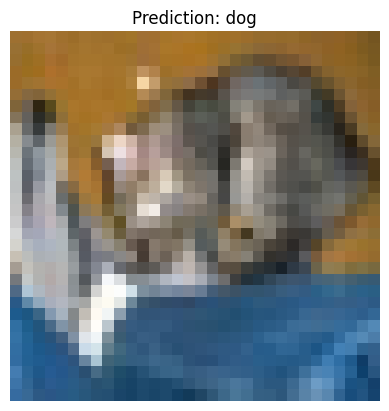

Predicted label: 5 - dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


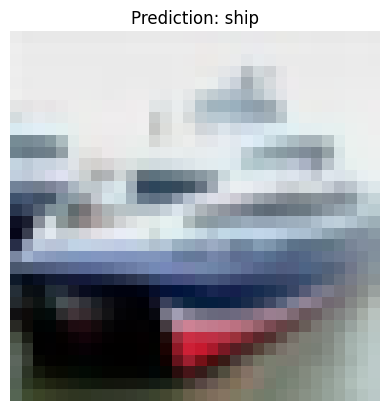

Predicted label: 8 - ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


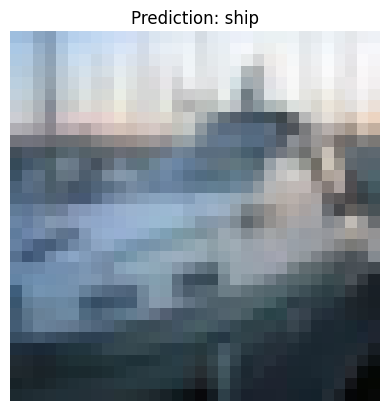

Predicted label: 8 - ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


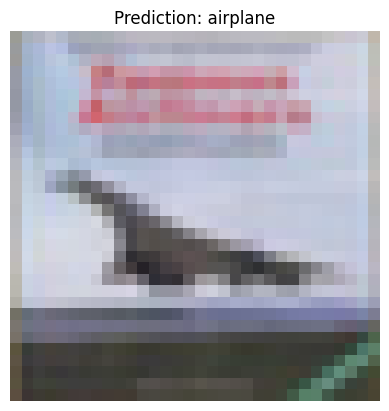

Predicted label: 0 - airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


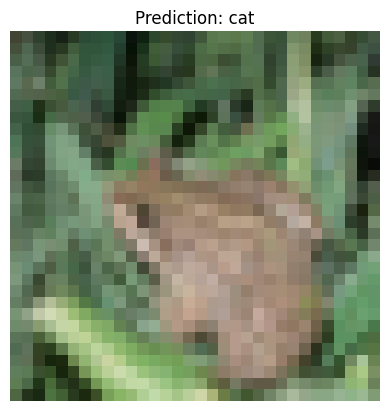

Predicted label: 3 - cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


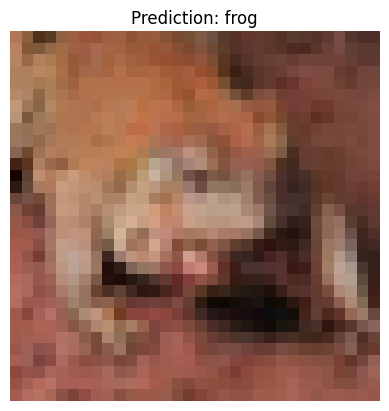

Predicted label: 6 - frog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


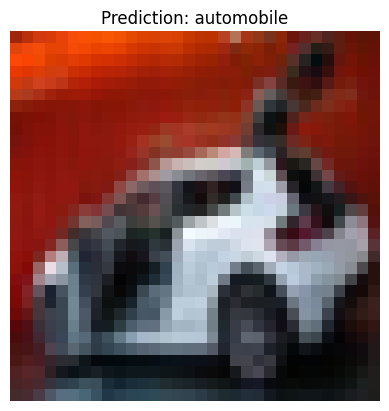

Predicted label: 1 - automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


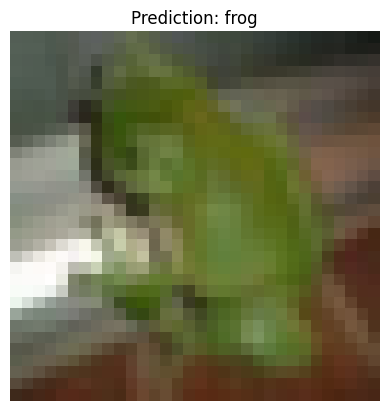

Predicted label: 6 - frog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


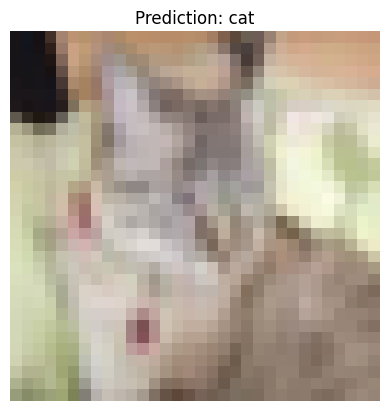

Predicted label: 3 - cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


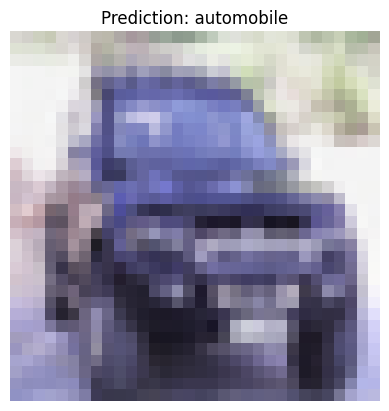

Predicted label: 1 - automobile


In [6]:
# Predict multiple images and show them
# Class names for CIFAR-10
class_names = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck']

for index in range(10):
    test_image = test_images[index]
    test_image_reshaped = np.reshape(test_image, (1, 32, 32, 3))

    prediction = model.predict(test_image_reshaped)
    predicted_label = np.argmax(prediction)

    plt.imshow(test_image)
    plt.axis('off')
    plt.title(f"Prediction: {class_names[predicted_label]}")
    plt.show()

    print("Predicted label:", predicted_label, "-", class_names[predicted_label])

In [7]:
# Get predictions on test data
test_predictions = model.predict(test_images)
predicted_labels = np.argmax(test_predictions, axis=1)  # Get predicted class for each image

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


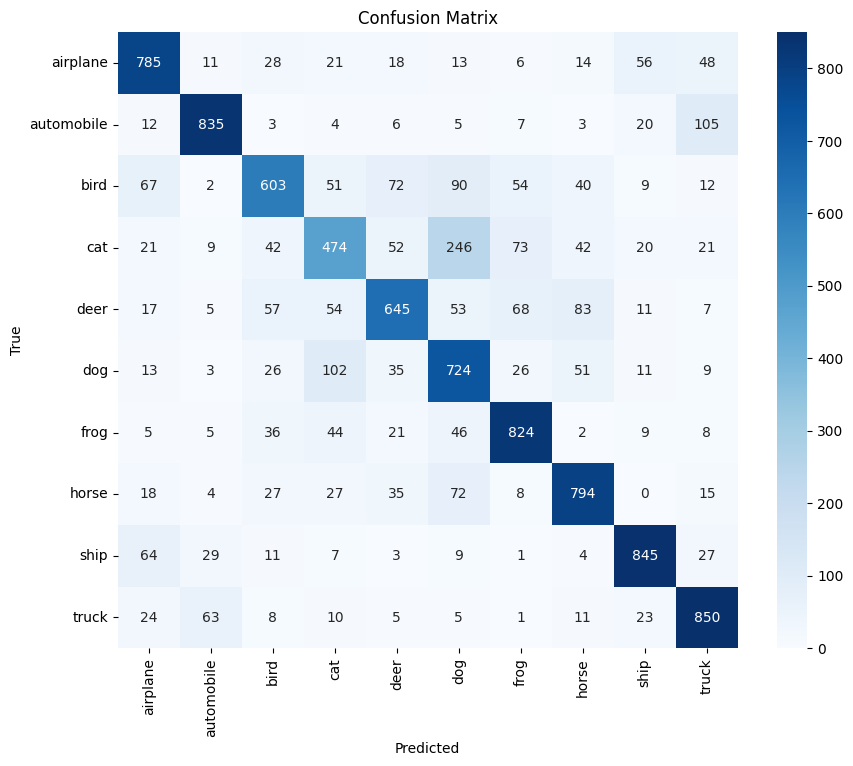

In [8]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()